In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler

# Comparison of different mRubis Environments

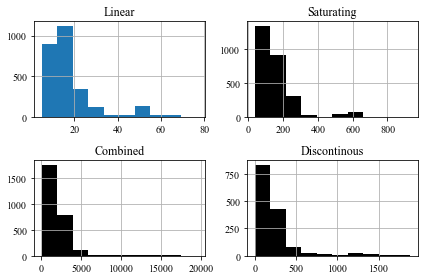

In [2]:
dh_linear = DataHandler(data_generation='Linear').data
dh_saturating = DataHandler(data_generation='Saturating').data
dh_combined = DataHandler(data_generation='Combined').data
dh_discontinous = DataHandler(data_generation='Discontinuous').data

# analyzing historgams
fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.hist(dh_linear['raw'].to_list())
ax1.title.set_text('Linear')
ax1.grid()
ax2 = fig.add_subplot(222)
plt.hist(dh_saturating['raw'].to_list(), color='black')
ax2.title.set_text('Saturating')
ax2.grid()
ax3 = fig.add_subplot(223)
plt.hist(dh_combined['raw'].to_list(), color='black')
ax3.title.set_text('Combined')
ax3.grid()
ax4 = fig.add_subplot(224)
plt.hist(dh_discontinous['raw'].to_list(), color='black')
ax4.title.set_text('Discontinous')
ax4.grid()
plt.tight_layout()
plt.savefig('data_analysis/01_plots/main_data_comparison.pdf') 
plt.show()

# Linear Environment

In [3]:
dh = DataHandler(data_generation='Linear')
total = len(dh.data.index)
groups = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).ngroups

print('We have ' + str(groups) + ' unqiue groups of <component, failure> and at total ' + str(total) + ' data points.')

We have 915 unqiue groups of <component, failure> and at total 2732 data points.


## Task 1: Plot the distribution 

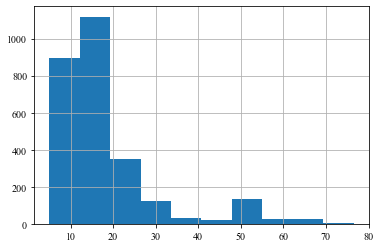

In [4]:
dh.data[dh.data.columns[2]].hist()

## Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

### Mean

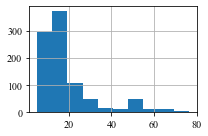

In [5]:
mean_values = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('mean')
mean_values.rename(columns={'raw': ''}).hist(figsize=(3,2))
plt.tight_layout()
plt.savefig('data_analysis/01_plots/linear_data_mean_pergroup.pdf') 

In [6]:
# get the outliers
mean_group = mean_values.apply(lambda x: x)
mean_group[mean_group.raw > 40]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE-zOOcdEeet0YmmfbMwkw,CF1,58.50
_SE0bTOcdEeet0YmmfbMwkw,CF3,49.50
_SE1CCecdEeet0YmmfbMwkw,CF3,49.50
_SE23oOcdEeet0YmmfbMwkw,CF1,56.25
_SE2Qd-cdEeet0YmmfbMwkw,CF1,49.50
...,...,...
_SFS9vOcdEeet0YmmfbMwkw,CF3,60.75
_SFSVCecdEeet0YmmfbMwkw,CF3,49.50
_SFSVkucdEeet0YmmfbMwkw,CF3,44.10


### Median

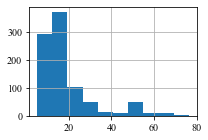

In [7]:
median = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('median')
median.rename(columns={'raw': ''}).hist(figsize=(3,2))
plt.savefig('data_analysis/01_plots/linear_data_median_pergroup.pdf') 

In [8]:
# get the outliers
group = median.apply(lambda x: x)
group[group.raw > 40]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE-zOOcdEeet0YmmfbMwkw,CF1,58.50
_SE0bTOcdEeet0YmmfbMwkw,CF3,49.50
_SE1CCecdEeet0YmmfbMwkw,CF3,49.50
_SE23oOcdEeet0YmmfbMwkw,CF1,56.25
_SE2Qd-cdEeet0YmmfbMwkw,CF1,49.50
...,...,...
_SFS9vOcdEeet0YmmfbMwkw,CF3,60.75
_SFSVCecdEeet0YmmfbMwkw,CF3,49.50
_SFSVkucdEeet0YmmfbMwkw,CF3,44.10


### Mode

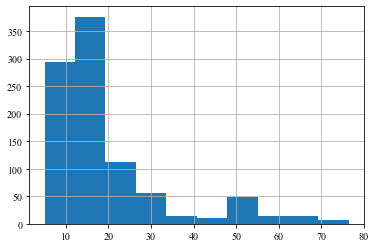

In [9]:
import operator
import functools

mode = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg(pd.Series.mode)
mode_values = mode[dh.data.columns[2]].values
mode_flatten = np.hstack(mode_values).tolist()

fig, ax = plt.subplots()
plt.hist(mode_flatten)
ax.grid()
plt.savefig('data_analysis/01_plots/linear_data_mode_pergroup.pdf') 

In [10]:
# get the outliers
mode_group = mode.apply(lambda x: x)
high_values = []
for index, row in mode_group.iterrows():
    if isinstance(row['raw'], np.ndarray):
        for value in row['raw']:
            if value >= 40:
                high_values.append([str(index), value])
    else:
        if row['raw'] >= 40:
            high_values.append([str(index), row['raw']])

print('Outliers:')
for value in high_values:
    print(value)

Outliers:
["('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')", 58.5]
["('_SE0bTOcdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SE1CCecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SE23oOcdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE23oOcdEeet0YmmfbMwkw', 'CF1')", 63.0]
["('_SE2Qd-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE3ehucdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE4FWecdEeet0YmmfbMwkw', 'CF2')", 54.0]
["('_SE57RecdEeet0YmmfbMwkw', 'CF3')", 58.5]
["('_SE8-O-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE8Xm-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE9lfucdEeet0YmmfbMwkw', 'CF1')", 67.5]
["('_SE_aXOcdEeet0YmmfbMwkw', 'CF2')", 49.5]
["('_SE_a_OcdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE_a_OcdEeet0YmmfbMwkw', 'CF2')", 49.5]
["('_SEtGGecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SEu7oecdEeet0YmmfbMwkw', 'CF1')", 63.0]
["('_SEuUQucdEeet0YmmfbMwkw', 'CF3')", 44.1]
["('_SEuUWecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SEviuucdEeet0YmmfbMwkw', 'CF2')", 63.0]
["('_SEwwu-cdEeet0YmmfbMwkw', 'CF1')", 58.5]
["('_SEx-lecdEeet0YmmfbMwkw', 'CF1')", 63.0]


### standard deviation

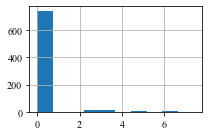

In [11]:
std = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('std')
std.rename(columns={'raw': ''}).hist(figsize=(3,2))
plt.tight_layout()
plt.savefig('data_analysis/01_plots/linear_data_std_pergroup.pdf') 

In [12]:
# get the outliers
std_group = std.apply(lambda x: x)
std_group[std_group.raw > 2]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE23oOcdEeet0YmmfbMwkw,CF1,7.394255
_SE7Iq-cdEeet0YmmfbMwkw,CF1,2.250000
_SEu7iucdEeet0YmmfbMwkw,CF3,5.634891
_SEvio-cdEeet0YmmfbMwkw,CF3,4.454773
_SEwwu-cdEeet0YmmfbMwkw,CF1,3.401680
_SEymFucdEeet0YmmfbMwkw,CF3,3.181981
_SEymIOcdEeet0YmmfbMwkw,CF1,5.250000
_SEz0XOcdEeet0YmmfbMwkw,CF3,2.474874
_SEz0XucdEeet0YmmfbMwkw,CF3,6.363961


### skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [13]:
values = dh.data['raw']
values.skew()

1.8350645562903793

In [14]:
# we have positive skewed data
mode = float(values.mode())
median = values.median()
mean = values.mean()
print(mode, '==', median, '<', mean)
print((mode == median) & (median < mean))

16.0 == 16.0 < 18.24110541727672
True


### kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

In [15]:
kurtosis = dh.data[dh.data.columns[2]].kurt()
kurtosis

3.482033125093173

In [16]:
# having leptokurtical data
exzess = kurtosis - 3
exzess > 0

True

## Result:

* The combination of <Query Service,CF5> shows particular high values
* We have a positive skewness, that increases the probability to get a lower value compared to the average.
* We have leptokurtical data what means that the values are distributed over a small range.